In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm
import sklearn.preprocessing as skp
import sklearn.metrics as skmetric
%matplotlib inline

In [2]:
df_funded = pd.read_csv("fundedTraining.csv")

C:\Users\Karthik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_funded.head()

,id,status,sector,posted_date,funded_date,loan_amount,partner_id,bonus_credit_eligibility,lender_count,repayment_term,repayment_interval,num_tags,num_images,video_present,country_code,funded_or_not
1,1127,refunded,Transportation,2006-11-05 07:49:12,2006-11-05 18:17:29,1200,11,False,16,11,Monthly,0,0,True,UG,True
2,5223,defaulted,Agriculture,2007-03-06 21:31:11,2007-03-07 13:23:08,225,6,False,4,12,Monthly,0,0,True,KE,True
7,25704,paid,Retail,2007-12-04 18:50:09,2007-12-04 21:52:36,500,71,False,20,8,Monthly,0,0,True,PE,True
8,29800,paid,Agriculture,2008-01-02 04:00:26,2008-01-02 08:44:12,225,71,False,8,8,Monthly,0,0,True,PE,True
10,37992,paid,Services,2008-02-24 00:10:40,2008-02-24 16:12:20,800,22,False,23,16,Monthly,0,0,True,TG,True


In [4]:
df_unfunded = pd.read_csv("NotfundedTraining.csv")

C:\Users\Karthik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (5,8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_unfunded.head()

,id,status,sector,posted_date,funded_date,loan_amount,partner_id,bonus_credit_eligibility,lender_count,repayment_term,repayment_interval,num_tags,num_images,video_present,country_code,funded_or_not
36,144599,expired,Services,2009-11-01 07:00:35,NaN,2750,73,False,24,8,Monthly,0,0,True,BO,False
95,522626,deleted,Retail,NaN,NaN,575,222,True,0,14,Monthly,0,0,True,UG,False
96,563761,inactive_expired,Housing,NaN,NaN,2125,180,False,0,26,Monthly,0,0,True,MN,False
114,66694,deleted,Clothing,NaN,NaN,950,102,False,0,NaN,NaN,0,0,True,TZ,False
192,666369,inactive_expired,Retail,NaN,NaN,3900,105,True,0,8,At end of term,0,0,True,SN,False


In [6]:
df_all = df_funded.append(df_unfunded)
df_all.head()

,id,status,sector,posted_date,funded_date,loan_amount,partner_id,bonus_credit_eligibility,lender_count,repayment_term,repayment_interval,num_tags,num_images,video_present,country_code,funded_or_not
1,1127,refunded,Transportation,2006-11-05 07:49:12,2006-11-05 18:17:29,1200,11,False,16,11,Monthly,0,0,True,UG,True
2,5223,defaulted,Agriculture,2007-03-06 21:31:11,2007-03-07 13:23:08,225,6,False,4,12,Monthly,0,0,True,KE,True
7,25704,paid,Retail,2007-12-04 18:50:09,2007-12-04 21:52:36,500,71,False,20,8,Monthly,0,0,True,PE,True
8,29800,paid,Agriculture,2008-01-02 04:00:26,2008-01-02 08:44:12,225,71,False,8,8,Monthly,0,0,True,PE,True
10,37992,paid,Services,2008-02-24 00:10:40,2008-02-24 16:12:20,800,22,False,23,16,Monthly,0,0,True,TG,True


In [8]:
import math
df_all['is_unfunded'] = ~df_all['funded_or_not'].astype(bool) * 1
df = df_all[['sector', 'loan_amount', 'repayment_term', 'num_tags', 'video_present', 'is_unfunded']].dropna()
# df['loan_amount'] = skp.scale(df['loan_amount'])
df['loan_amount'] = df['loan_amount'].apply(math.log)

In [10]:
df.head()

,sector,loan_amount,repayment_term,num_tags,video_present,is_unfunded
1,Transportation,7.090077,11,0,True,0
2,Agriculture,5.416100,12,0,True,0
7,Retail,6.214608,8,0,True,0
8,Agriculture,5.416100,8,0,True,0
10,Services,6.684612,16,0,True,0


In [11]:
X_train = df[['sector', 'loan_amount', 'repayment_term', 'num_tags', 'video_present']]
y_train = df['is_unfunded']

### Responsible variable: Is_Unfunded

### Predictor variables: Sector, Loan amount, Repayment Term, Num Tags, Video Present

In [12]:
X_train = pd.get_dummies(X_train)
X_train.shape

(680096, 19)

In [13]:
df_test_funded = pd.read_csv("fundedTest.csv")
df_test_unfunded = pd.read_csv("NotfundedTest.csv")
df_test = df_test_funded.append(df_test_unfunded)
df_test['is_unfunded'] = ~df_test['funded_or_not'].astype(bool) * 1
df_test = df_test[['sector', 'loan_amount', 'repayment_term', 'num_tags', 'video_present', 'is_unfunded']].dropna()
df_test['loan_amount'] = skp.scale(df_test['loan_amount'])

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [14]:
X_test = df_test[['sector', 'loan_amount', 'repayment_term', 'num_tags', 'video_present']]
y_test = df_test['is_unfunded']
X_test = pd.get_dummies(X_test)

In [15]:
model = sklm.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [17]:
len(pred[pred==0])

290542

In [18]:
len(pred[pred==1])

1166

In [19]:
len(y_test[y_test==0])

277185

In [20]:
len(y_test[y_test==1])

14523

In [21]:
pred_zero_values = y_test[pred==0]

In [22]:
len(pred_zero_values[pred_zero_values==0])

276178

In [23]:
len(pred_zero_values[pred_zero_values==1])

14364

In [24]:
pred_one_values = y_test[pred==1]

In [25]:
len(pred_one_values[pred_one_values==0])

1007

In [26]:
len(pred_one_values[pred_one_values==1])

159

In [27]:
pred_train = model.predict(X_train)

In [28]:
len(pred_train[pred_train==0])

679708

In [29]:
len(pred_train[pred_train==1])

388

In [30]:
len(y_train[y_train==0])

646883

In [31]:
len(y_train[y_train==1])

33213

In [32]:
predicted_zeroes = y_train[pred_train==0]

In [33]:
len(predicted_zeroes[predicted_zeroes==0])

646520

In [34]:
len(predicted_zeroes[predicted_zeroes==1])

33188

In [35]:
predicted_ones = y_train[pred_train==1]

In [36]:
len(predicted_ones[predicted_ones==0])

363

In [37]:
len(predicted_ones[predicted_ones==1])

25

In [38]:
skmetric.accuracy_score(y_test, model.predict(X_test))

0.94730689593703288

In [39]:
a = len(y_test[y_test==0])

In [40]:
b = len(y_test[y_test==1])

In [41]:
a/(a+b)

0.9502139125426796

### The baseline performance by predicting Funded is 95.02% and the first prediction model has a 94.95% accuracy so far.

In [42]:
X_train.columns

Index(['loan_amount', 'repayment_term', 'num_tags', 'sector_Agriculture',
       'sector_Arts', 'sector_Clothing', 'sector_Construction',
       'sector_Education', 'sector_Entertainment', 'sector_Food',
       'sector_Health', 'sector_Housing', 'sector_Manufacturing',
       'sector_Personal Use', 'sector_Retail', 'sector_Services',
       'sector_Transportation', 'sector_Wholesale', 'video_present_True'],
      dtype='object')

In [43]:
model.coef_

array([[ 0.64211845,  0.02578576,  0.16346756,  0.10573951, -1.29464613,
         0.16427361, -0.40130701, -1.43426378, -0.78199507,  0.01063564,
        -0.6667468 ,  0.92091569, -1.25486711,  0.39812135,  0.39576391,
        -0.11337045,  0.46799172, -0.45328821, -3.93704313]])

In [44]:
df_summary = pd.DataFrame([X_train.columns, model.coef_[0]])
df_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,loan_amount,repayment_term,num_tags,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,video_present_True
1,0.642118,0.0257858,0.163468,0.10574,-1.29465,0.164274,-0.401307,-1.43426,-0.781995,0.0106356,-0.666747,0.920916,-1.25487,0.398121,0.395764,-0.11337,0.467992,-0.453288,-3.93704


In [45]:
probs = model.predict_proba(X_test)

In [46]:
model.classes_

array([0, 1], dtype=int32)

In [47]:
funded_prob = probs[:,0]
unfunded_prob = probs[:, 1]

In [48]:
df_unfunded = pd.DataFrame(unfunded_prob)

In [49]:
df_unfunded.to_csv("unfunded_prob.csv", header=False, index=False)

In [50]:
y_test.to_csv("ytest.csv", header=False, index=False)

In [51]:
filename = "unfunded_prob.csv"
df_unfunded_prob = pd.read_csv(filename)
probs = np.array(df_unfunded_prob).flatten()

In [52]:
unfunded_prob

array([ 0.01381024,  0.03572811,  0.05491626, ...,  0.05775964,
        0.03277661,  0.03439567])

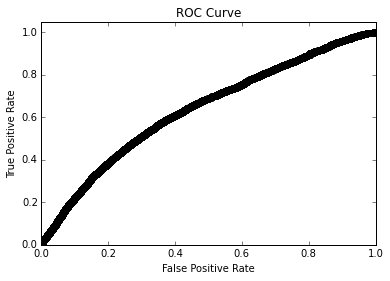

In [53]:
fpr, tpr, thresholds = skmetric.roc_curve(y_test, unfunded_prob,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [54]:
skmetric.roc_auc_score(y_true=y_test==1, y_score=unfunded_prob,)

0.63629882413648287

In [55]:
baseline_probs = np.zeros(probs.shape[0])

In [56]:
fpr, tpr, thresholds = skmetric \
    .roc_curve(y_test, baseline_probs,)

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve of baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: Found arrays with inconsistent numbers of samples: [291707 291708]

In [ ]:
skmetric.roc_auc_score(y_true=y_test==True, y_score=baseline_probs,)

In [ ]:
precisions, recalls, thresholds = skmetric.precision_recall_curve(y_test, unfunded_prob,)
plt.plot(recalls, precisions, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
skmetric.average_precision_score(y_true=(y_test==1), y_score=unfunded_prob,)

In [ ]:
precisions, recalls, thresholds = skmetric.precision_recall_curve(y_test, baseline_probs,)
plt.plot(recalls, precisions, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
skmetric.average_precision_score(y_true=(y_test==1), y_score=baseline_probs,)